# Numerical Homework 3

Code as follow for problems that require it

#### Original work created on 18/11/2022

#### Author: Terry Cox  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1


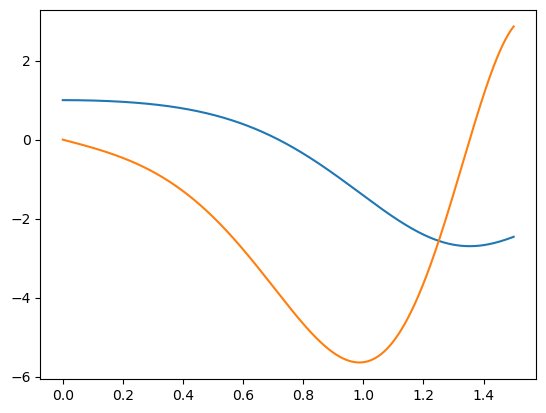

In [50]:
def f(x):
    return np.cos(2*x**2) - x**2

def dx(x):
    return -4*x*np.sin(2*x**2) - 2*x

x = np.linspace(0, 1.5, 1000)

plt.plot(x,f(x))
plt.plot(x,dx(x))
plt.show()

#### a)

In [51]:
def newton_iterate(x, f, dx):
    return x - f(x)/dx(x)

def Newtons_Method(f, dx, x0, tol=1e-10):
    results = {'x' : [x0], 'fx' : [f(x0)], 'abs_error' : [np.abs(f(x0))]}
    if dx(x0) == 0:
        print('Derivative is 0.  Bad starting point.')
        return False
        
    i = 0
    while results['abs_error'][-1] > tol:
        x = newton_iterate(results['x'][-1], f, dx)
        fx = f(x)
        results['x'].append(x)
        results['fx'].append(fx)
        results['abs_error'].append(np.abs(fx))
        if i > 100000:
            print('running away!')
            return False
        i+=1
    return results

x0 = 0.1
tol = 1e-10
newton_results = Newtons_Method(f, dx, x0, tol)
print('Result x:', newton_results['x'][-1])
print('Iterates:', len(newton_results['x']))

Result x: 0.7175885065001595
Iterates: 10


#### b)

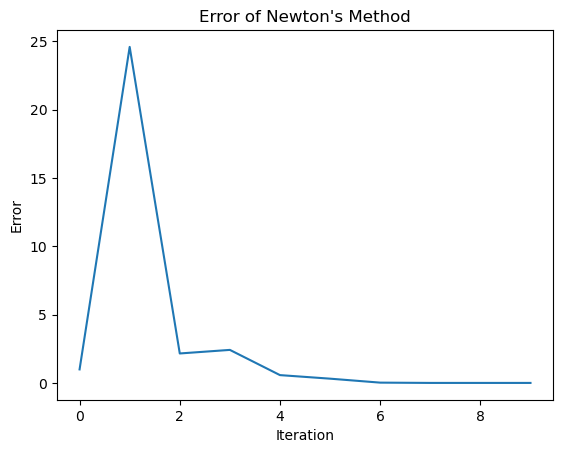

In [52]:
plt.plot(list(range(len(newton_results['x']))), newton_results['abs_error'])
plt.title('Error of Newton\'s Method')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

#### c)

In [66]:
range_of_x0_converage = []
failed = []
for x0 in x:
    r = Newtons_Method(f, dx, x0, tol)
    if r is False:
        failed.append(x0)
        continue
    if np.abs(r['x'][-1] - newton_results['x'][-1]) < tol:
        range_of_x0_converage.append(x0)
    else:
        failed.append(x0)
print(min(range_of_x0_converage), max(range_of_x0_converage))

Derivative is 0.  Bad starting point.


/var/folders/rl/dh7964x17b5dty1h0dn8bkcr0000gn/T/ipykernel_1819/1167976267.py:2: RuntimeWarning: overflow encountered in double_scalars
  return np.cos(2*x**2) - x**2
/var/folders/rl/dh7964x17b5dty1h0dn8bkcr0000gn/T/ipykernel_1819/1167976267.py:2: RuntimeWarning: invalid value encountered in cos
  return np.cos(2*x**2) - x**2


0.0015015015015015015 1.5


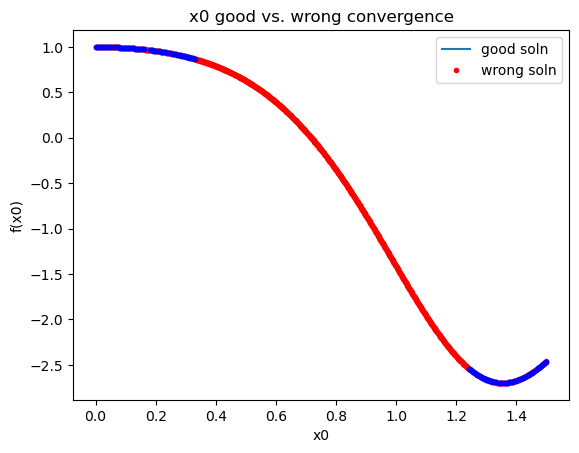

In [75]:
plt.plot(x,f(x))
good = np.array(range_of_x0_converage)
bad = np.array(failed)
plt.plot(good, f(good), 'r.')
plt.plot(bad, f(bad), 'b.')
plt.legend(['good soln', 'wrong soln'])
plt.title('x0 good vs. wrong convergence')
plt.xlabel('x0')
plt.ylabel('f(x0)')
plt.show()

In [73]:
range_of_convergence = max(list(zip(bad[:-1], bad[1:])), key=lambda d: d[1]-d[0])
print('range of convergence (x0): ', range_of_convergence)

range of convergence (x0):  (0.3303303303303303, 1.2417417417417418)


## Problem 2

This was strictly for fun!

In [150]:
def phi_1(x):
    return x**2-2

def f1(x):
    return x**2-x-2

def fixed_point_conv(p, f, x0):
    results = {'x' : [x0], 'f' : [f(x0)]}
    for i in range(2):
        x = p(results['x'][-1])
        results['x'].append(x)
        results['f'].append(f(x))
    return results

In [151]:
x0 = 0/20
r = fixed_point_conv(phi_1, f1, x0)

In [152]:
r['x'][-1], r['f'][-1]

(2.0, 0.0)

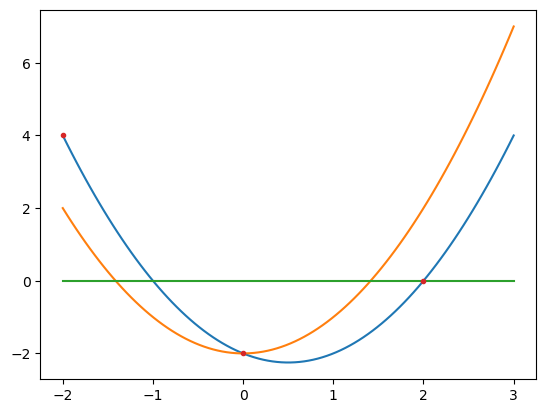

In [153]:
x = np.linspace(-2,3, 100)

plt.plot(x, f1(x))
plt.plot(x, phi_1(x))
plt.plot(x, 0*x)
plt.plot(r['x'], f1(np.array(r['x'])), '.')
plt.show()

## Problem 5

#### a)

In [182]:
def get_spetral_radius(A):
    eigs = []
    for lam in np.linalg.eigvals(A):
        try:
            l = (lam.real**2 + lam.imag**2)**(1/2)
        except:
            l = lam
        eigs.append(l)
        
    return np.max(np.abs(eigs))

J = np.matrix([[0, 2/27, 1/3],
              [1/3, 0, 0],
              [0, 1/3, 0]])
get_spetral_radius(J)

0.3579828540999226

#### b)

In [171]:
def phi(x):
    return [
        -1/81*np.cos(x[0])+x[1]**2/9+np.sin(x[2])/3,
        1/3*np.sin(x[0])+np.cos(x[2])/3,
        -1/9*np.cos(x[0])+x[1]/3+np.sin(x[2])/6
    ]

def fixed_point_conv(p, x0, tol=1e-8):
    results = {'x' : [x0, p(x0)], 'iterates':2}
    while np.mean(np.abs(np.array(results['x'][-1])-np.array(results['x'][-2]))) > tol:
        x = p(results['x'][-1])
        results['x'].append(x)
        results['iterates'] += 1
    return results

In [172]:
x0 = [0,0,0]
r = fixed_point_conv(phi, x0)

In [178]:
print('Fixed Point Convergence of Equation 3:', r['x'][-1])

Fixed Point Convergence of Equation 3: [-6.779271898635295e-09, 0.33333332789224485, -7.26512985861346e-09]


#### c)

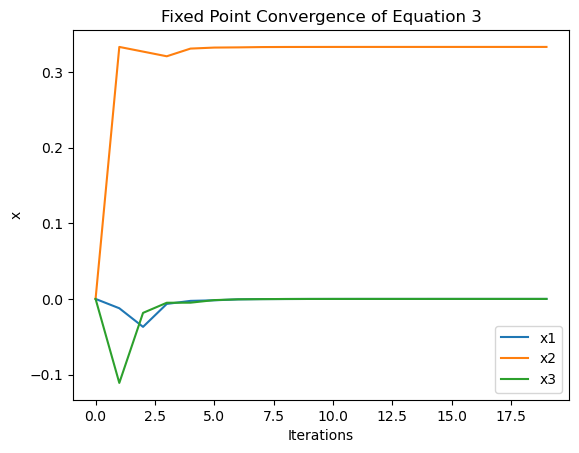

In [176]:
plt.plot(list(range(r['iterates'])), r['x'])
plt.title('Fixed Point Convergence of Equation 3')
plt.xlabel('Iterations')
plt.ylabel('x')
plt.legend(['x1', 'x2', 'x3'])
plt.show()